# Q-Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 8]

actions = np.array([[-1,  0],
                    [ 0, -1],
                    [ 1,  0],
                    [ 0,  1]], dtype=int)
rt = 0
up = 1
lf = 2
dn = 3

grid = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1],
                 [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
                 [1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1],
                 [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1],
                 [1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1],
                 [1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
                 [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
                 [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
                 [1, 0, 1, 1, 1, 1, 1, 1, 0, 4, 1],
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                 [1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int)
path = 0
wall = 1
strt = 2
goal = 3
objt = 4

symbol_rewards = np.array([0., -1., 0., 10., 3.])
out_reward = 0.

symbol_terminal = np.array([False, False, False, True, False], dtype=bool)

def gridworld_init():
    return (np.concatenate(np.where(grid == strt)))[np.array([1, 0])]

def gridworld_step(s, a):
    sprime = s + actions[a]
    if np.any(sprime < 0) or np.any(sprime >= grid.shape):
        r = out_reward
        sprime = s
    else:
        r = symbol_rewards[grid[tuple(sprime.tolist())]]
    if grid[tuple(sprime.tolist())] == wall:
        sprime = s
    return (sprime, r)
def gridworld_is_terminal(s):
    return symbol_terminal[grid[s]]

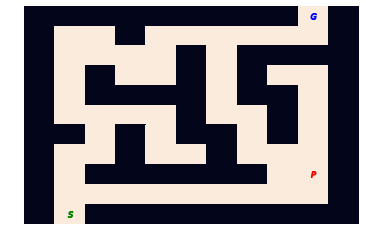

In [2]:
vis_map = np.array([1., 0., 1., 1., 1.])[grid]
fig, ax = plt.subplots(1,1)
ax = sns.heatmap(vis_map, cbar = False, ax=ax)
ax.axis('off')
start_pos = (np.concatenate(np.where(grid == strt)))[np.array([1, 0])]
start_glyph = plt.scatter(start_pos[0] + 0.5, start_pos[1] + 0.5, marker="$S$", color='green')
goal_pos = (np.concatenate(np.where(grid == goal)))[np.array([1, 0])]
goal_glyph = plt.scatter(goal_pos[0] + 0.5, goal_pos[1] + 0.5, marker="$G$", color='blue')
pizza_pos = (np.concatenate(np.where(grid == objt)))[np.array([1, 0])]
pizza_glyph = plt.scatter(pizza_pos[0] + 0.5, pizza_pos[1] + 0.5, marker="$P$", color='red')
plt.show()

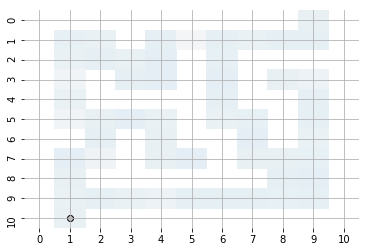

In [21]:
vis_filter = np.array([1., np.nan, 1., 1., 1.])[grid]
Q = np.random.random((grid.shape[0], grid.shape[1], actions.shape[0]))
vis_map = np.max(Q, 2) * vis_filter
fig, ax = plt.subplots(1,1)
ax = sns.heatmap(vis_map, vmin=-10, vmax=10, cmap='RdBu', cbar = False, ax=ax)
ax.grid(True)
s = gridworld_init()
(sprime, r) = gridworld_step(s, lf)
#ax = sns.heatmap(vis_map, cmap='RdBu', annot=True, cbar = False, annot_kws={"size": 18})
agent_glyph = plt.scatter(sprime[0] + 0.5, sprime[1] + 0.5, marker="o", color=[0.8, 0.8, 0.8], edgecolors='black')
plt.show()

In [ ]:
# Creating animated vissualization
fig = plt.figure()
camera = Camera(fig)

for i in range(iteration):
    V = trace_V[i]
    s = trace_s[i]

    camera.snap()

animation = camera.animate()
plt.show()

In [ ]:
# Playing the animation
HTML(animation.to_jshtml())